In [2]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from time import strptime

In [3]:
dt = pd.read_csv('./daily_trac.csv')
dt.drop('Tags', inplace=True, axis=1)
dt

,Name,Date,Series,Reps,Weight
0,Press banca,"April 6, 2022",4,12,20
1,Press banca,"April 7, 2022",4,12,26
2,Press banca,"April 8, 2022",4,12,22
3,Press banca,"April 10, 2022",4,12,30


In [ ]:
# get the data for the specified exercise
name_exercise = input("Introduce the name of the exercise: ")

dt = dt[dt['Name'] == name_exercise]

In [3]:
# here we have to replace the date values from the notion to year-month-day
for i, row in dt.iterrows():

    date = dt['Date'][i].split(', '[1])

    year = date[2]
    day = date[1][:-1]
    month = str(strptime(date[0][:3],'%b').tm_mon)

    if len(day) == 1:
        day = f'0{day}'

    if len(month) == 1:
        month = f'0{month}'

    dt.at[i, 'Date'] = int(f'{year}{month}{day}')

    # create the date for the graph
    dt['sort_date'] = datetime.date(int(year), int(month), int(day))

In [5]:
# sort the dataset into the date
dt["sort_date"] = pd.to_datetime(dt["Date"])

dt = dt.sort_values(by="sort_date")

In [6]:
# delete the column of the pandas dataset
dt.drop('sort_date', inplace=True, axis=1)

In [7]:
dt

,Name,Date,Series,Reps,Weight
0,Press banca,20220406,4,12,20
1,Press banca,20220407,4,12,26
2,Press banca,20220408,4,12,22
3,Press banca,20220410,4,12,30


0    20220406
1    20220407
2    20220408
3    20220410
Name: Date, dtype: object


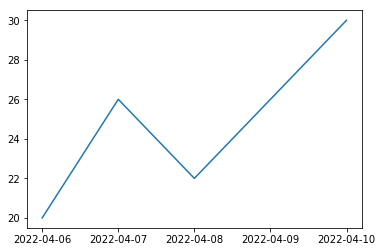

In [17]:
dates = ["2020-01-02","2020-01-03", "2020-01-04"]
dates = dt['Date']

x_values = [datetime.datetime.strptime(str(d),"%Y%m%d").date() for d in dates]
y_values = dt['Weight']

ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)